In [1]:
import pandas as pd
import numpy as np

data = np.array(['a','l','e','x'])

s = pd.Series(data)

print(s)

0    a
1    l
2    e
3    x
dtype: object


## Linear Regression

- Stastical technique used to find the equation of a line(or hyperplane) that is closest to all the points in the dataset.

In [6]:
# load the boston house dataset

# from sklearn.datasets import load_boston
# boston_dataset = load_boston()

from sklearn.datasets import load_boston
boston_dataset = load_boston()

df_boston_features = pd.DataFrame(data = boston_dataset.data, 
columns=boston_dataset.feature_names)
df_boston_target = pd.DataFrame(data = boston_dataset.target, columns=['price'])


# print a description of the dataset
print(boston_dataset.DESCR)

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [8]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
housing = fetch_california_housing()

# Create features and target DataFrames
df_housing_features = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df_housing_target = pd.DataFrame(data=housing.target, columns=["MedHouseValue"])

# Print dataset description
print(housing.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [35]:
# create a training dataset and a test dataset using the 75/25 split

from sklearn.model_selection import train_test_split

housing_split = train_test_split(df_housing_features,df_housing_target,
                                test_size=0.25, 
                                random_state=17)

df_housing_features_train = housing_split[0]
df_housing_features_test = housing_split[1]
df_housing_target_train = housing_split[2]
df_housing_target = housing_split[3]

# train a linear model

from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression(fit_intercept=True) # fit intercept used to indicate the samples are not 
                                                                # zero-centered and the model should calculate the intercept term
linear_regression_model.fit(df_housing_features_train, df_housing_target_train)

print(linear_regression_model.coef_)

ValueError: Found input variables with inconsistent numbers of samples: [20640, 5160]

In [37]:
# checking the shape of the inputs
print(df_housing_features.shape)
print(df_housing_target.shape)


(20640, 8)
(5160, 1)


- The bug: overwriting the original df_housing_target which has 20640 rows with only
- 25% of the data(test portion = 5160 samples)
- df_housing_target = housing_split[3]


In [75]:
# unpacking the results of test_split_test correctly to fix the
# assiging each distinct variable,
# avoiding overwriting the main dataset

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.datasets import fetch_california_housing

# load data
housing = fetch_california_housing()

df_housing_features = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing_target = pd.DataFrame(housing.target, columns=['MedHouseValue'])

# split the data into training and test set
df_housing_features_train, df_housing_features_test, df_housing_target_train, df_housing_target_test = train_test_split(
    df_housing_features,
    df_housing_target,
    test_size=.25,
    random_state=17)


# the model training

linear_regression_model = LinearRegression(fit_intercept=True)
linear_regression_model.fit(df_housing_features_train, df_housing_target_train)

# printing the coefficients

print("Model Coefficients:")
print(linear_regression_model.coef_)


Model Coefficients:
[[ 4.31931807e-01  9.79245007e-03 -1.01447994e-01  5.90386998e-01
  -1.34359859e-06 -3.37731930e-03 -4.24316625e-01 -4.38429913e-01]]


In [49]:
for feature, coef in zip(df_housing_features.columns, linear_regression_model.coef_[0]):
    print(f"{feature}: {coef:.4f}")


MedInc: 0.4319
HouseAge: 0.0098
AveRooms: -0.1014
AveBedrms: 0.5904
Population: -0.0000
AveOccup: -0.0034
Latitude: -0.4243
Longitude: -0.4384


In [51]:
# making predictions on the test set using linear_regression_model

predicted_median_house_prices = linear_regression_model.predict(df_housing_features_test)

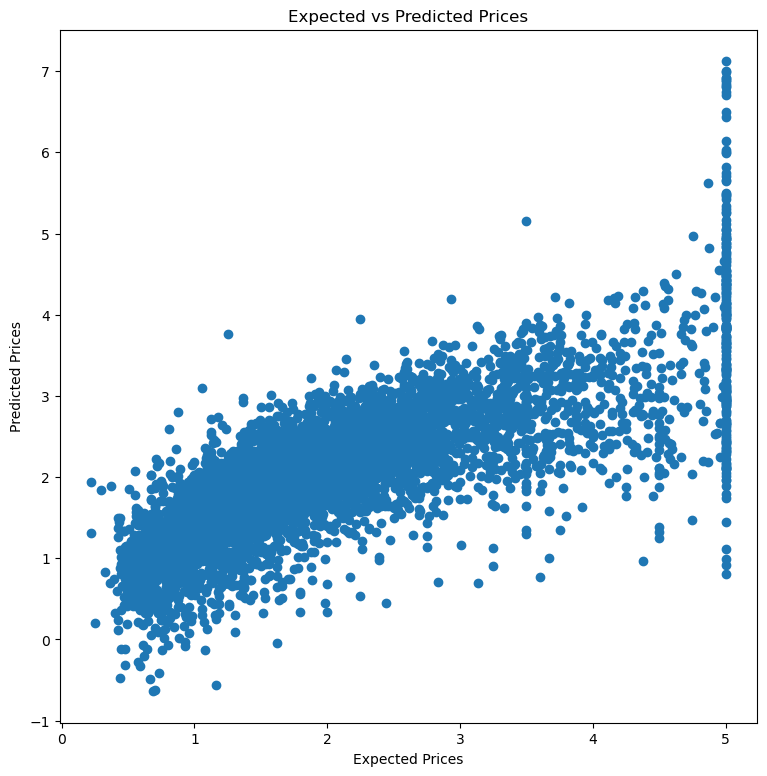

In [57]:
# getting idea of the quality of predictions created by this model
# by creating a scatter plot of the predictions made by the model on the
# test dataset agaist the actual house prices in the test set.
# using functions from Matplotlib's pyplot module to create a scatter plot

%matplotlib inline
import matplotlib.pyplot as plt

# use pyplot module to create a scatter plot of predicted vs expected values

fig, axes = plt.subplots(1, 1, figsize=(9,9))
plt.scatter(df_housing_target_test, predicted_median_house_prices)
plt.xlabel("Expected Prices")
plt.ylabel("Predicted Prices")
plt.title("Expected vs Predicted Prices")
plt.show()

- The ideal case: the scatter plot of the expected housing prices against the values predicted b your model should be close to a straight line.

### Understanding the results of changing the fit_intercept parameter while creating the LinearRegression Instance

- The snippet below will create a synthetic dataset of 50 random two_dimensional points and attempts to create two liear regression models on the data.
- The first model is created with the fit_intercept = False and the second model created with fit_intercept = True
- Both models are presented with the X and Y coordinates of the 50 points as training data.
- The X coordinate values representing the feature variable and Y coordinate representing the target variable.
- After training the model, will be able to predict the Y coordinate from the X coordinate.
- The X coordinate is the only input feature of this model, the model will contain only one coefficient term.
- The snippet creates a scatter plot of 50 points and overlays the regression line generated by each model.

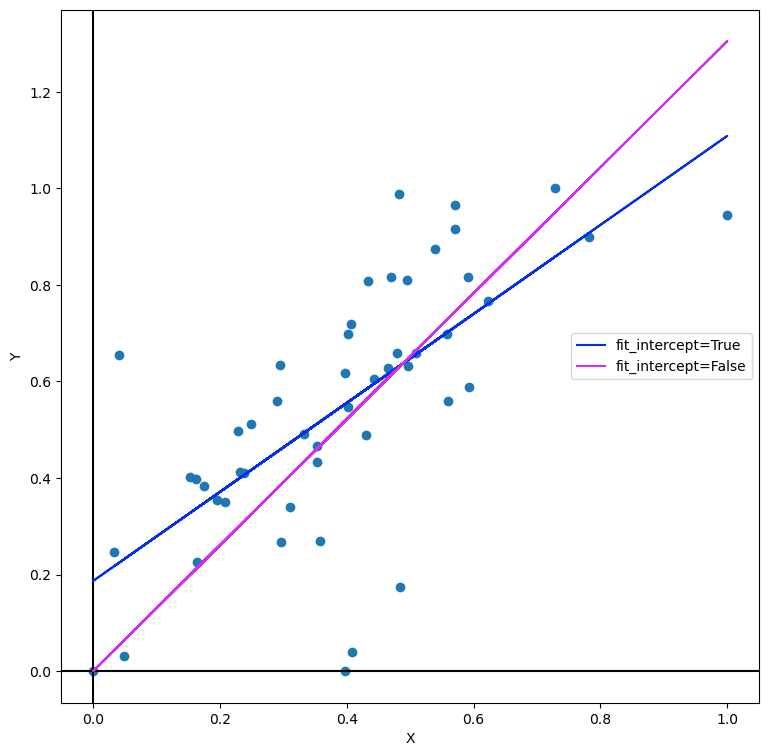

In [69]:
# create a synthetic regression dataset of X and Y values

from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
import numpy as np
SyntheticX, SyntheticY = make_regression(n_samples=50, n_features=1, noise=35.0, random_state=17)

x_scaler = MinMaxScaler()
x_scaler.fit(SyntheticX.reshape(-1,1))
SyntheticX = x_scaler.transform(SyntheticX.reshape(-1,1))
y_scaler = MinMaxScaler()
y_scaler.fit(SyntheticY.reshape(-1,1))
SyntheticY = y_scaler.transform(SyntheticY.reshape(-1,1))

# demonstrate effect of fit_intercept parameter on a simplye synthetic dataset

linear_regression_model_synthetic1 = LinearRegression(fit_intercept=True)
linear_regression_model_synthetic1.fit(SyntheticX, SyntheticY)

linear_regression_model_synthetic2 = LinearRegression(fit_intercept=False)
linear_regression_model_synthetic2.fit(SyntheticX, SyntheticY)

c1 = linear_regression_model_synthetic1.coef_
i1 = linear_regression_model_synthetic1.intercept_
YPredicted1 = np.dot(SyntheticX, c1) + i1
c2 = linear_regression_model_synthetic2.coef_
i2 = linear_regression_model_synthetic2.intercept_
YPredicted2 = np.dot(SyntheticX, c2) + i2


# use pyplot module to create a scatter plot od sythetic dataset
# and ovrelay the regression line from the two models

fig, axes = plt.subplots(1, 1,figsize=(9,9))
axes.axhline(y=0, color='k')
axes.axvline(x=0, color='k')
plt.scatter(SyntheticX, SyntheticY)
plt.plot(SyntheticX, YPredicted1, color='#042fed', label='fit_intercept=True')
plt.plot(SyntheticX, YPredicted2, color='#d02fed', label='fit_intercept=False')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

- Regression line generated by the model with fit_intercept=False is anchored at Y=0.
- The model is therefore contrained in terms of the lines it can generate.
- On the other hand, the line generated by the model with fit_intercept=True is not anchored at y=0, and therefore the model is able to determine the best value for the Y intercept as a result of training the process.